**Examples**

Optimal Baseball

In [10]:
try:
    from pint import UnitRegistry
except ImportError:
    !pip install pint

from pint import UnitRegistry
units = UnitRegistry()

In [11]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://github.com/AllenDowney/ModSimPy/raw/master/' +
         'modsim.py')

In [12]:
from modsim import *

In [13]:
download('https://github.com/AllenDowney/ModSimPy/raw/master/' +
         'chap22.py')

In [14]:
from chap22 import params
from chap22 import make_system
from chap22 import slope_func
from chap22 import event_func

The Manny Ramirez Problem

In [15]:
ftm = (1 * units.feet).to(units.meter).magnitude

params = params.set(
    wall_distance = 310 * ftm,
    wall_height = 37 * ftm,
)

show(params)

,value
x,0.0000
y,1.0000
angle,45.0000
speed,40.0000
mass,0.1450
diameter,0.0730
C_d,0.3300
rho,1.2000
g,9.8000
t_end,10.0000


Finding the Range

In [19]:
def range_func(angle, params):
    params = params.set(angle=angle)
    system = make_system(params)
    results, details = run_solve_ivp(system, slope_func, events=event_func)
    x_dist = results.iloc[-1].x
    print(angle, x_dist)
    return x_dist

In [25]:
range_func(45, params)
ang = linspace(20, 80, 21)
sweep = SweepSeries()

for angle in ang:
    x_dist = range_func(angle, params)
    sweep[angle] = x_dist

45 99.31829628352207
20.0 78.09741067882733
23.0 84.11542610650983
26.0 89.13192412363966
29.0 93.17466724082834
32.0 96.27134737391354
35.0 98.44725560273994
38.0 99.72474586365274
41.0 100.12347299697635
44.0 99.66100302635328
47.0 98.35354763684825
50.0 96.21673516565134
53.0 93.26623796736267
56.0 89.51751617672976
59.0 84.98724481958087
62.0 79.69434524339994
65.0 73.66129770133256
68.0 66.91470886279748
71.0 59.482694929397475
74.0 51.402871099404315
77.0 42.72047925533483
80.0 33.48437980813934


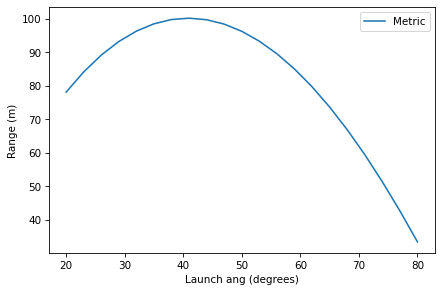

In [26]:
sweep.plot()
decorate(xlabel='Launch ang (degrees)',
         ylabel='Range (m)')

In [27]:
result = maximize_scalar(range_func, params, bounds=[0, 90])
print(result)
print(result.x, result.fun)

0 17.468795355645696
34.37694101250946 98.06996498016366
55.62305898749054 90.03182421721928
21.246117974981075 80.72039493627986
41.173855871044005 100.1200188931698
40.980120907838035 100.12368377099199
40.882137319070246 100.1241700443184
40.87925420124324 100.12417043309694
40.87928713865314 100.12417043314977
40.879291078324286 100.12417043314917
40.879283198981994 100.12417043314895
 message: Solution found.
 success: True
  status: 0
     fun: 100.12417043314977
       x: 40.87928713865314
     nit: 10
    nfev: 10
40.87928713865314 100.12417043314977


**Exercises**

Exercise 1

In [28]:
def event_func(t, state, system):
    x, y, vx, vy = state
    return x - system.wall_distance
system = make_system(params)
event_func(0, system.init, system)

-94.48799999999999

In [29]:
def height_func(angle, params):
    params = params.set(angle=angle)
    system = make_system(params)

    result, details = run_solve_ivp(system, slope_func, events=event_func)
    height = result.iloc[-1].y
    return height

height_func(40, params)

6.661045303535705

In [30]:
result = maximize_scalar(height_func, params, bounds=[0, 90])
print(result)
print(result.x, result.fun)

 message: Solution found.
 success: True
  status: 0
     fun: 7.217049532932801
       x: 43.105080979149434
     nit: 13
    nfev: 13
43.105080979149434 7.217049532932801


In [31]:
def error_func(speed, params):
    params = params.set(speed=speed)
    print(params.speed)
    result = maximize_scalar(height_func, params, bounds=[0, 90])
    return result.fun - params.wall_height

print(error_func(40, params))
print(error_func(50, params))

40
-4.060550467067197
50
30.230189540329683


In [32]:
bracket = [30, 50]
result = root_scalar(error_func, params, bracket=bracket)

30
30.0
50.0
42.95327159575888
41.030931458411445
41.039294634028856
41.037242669296155


In [33]:
print(result)
min_speed = result.root
print(min_speed)
print(error_func(min_speed, params))

      converged: True
           flag: converged
 function_calls: 6
     iterations: 5
           root: 41.039294634028856
41.039294634028856
41.039294634028856
0.0010039392295357885
